In [5]:
import torch
print("Pytorch " + torch.__version__)
import pandas as pd
import numpy as np

from torch import nn
from torch.utils.data import Dataset, DataLoader

from transformers import Trainer, TrainingArguments, EvalPrediction
from datasets import load_dataset

from sklearn import metrics
from scipy import stats
from functools import partial
from tqdm.auto import tqdm

from tpot import TPOTClassifier
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

from Bio import Phylo, AlignIO
from Bio.Phylo.TreeConstruction import DistanceCalculator, DistanceTreeConstructor
import joblib

# Create device agnostic code

DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
DEVICE

c:\Users\Dart_ilder\miniconda3\envs\.conda_Cas\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Pytorch 1.13.1


'cuda'

In [2]:
cas_voc = pd.read_csv("./cas_voc.tsv", sep="\t")
embs = cas_voc["Embs"]
labels = cas_voc["Gene_family"]
embs = [np.fromstring(row, sep=',') for row in embs]
embs = np.array(embs)
len(embs)
# Making my own tokenizer because apparently TPOT forgot how to read string classes

path_classes = "./genes_to_use.tsv"
with open(path_classes) as file:
    lines = []
    for i, line in enumerate(file):
        if i!=0:
            line = line.rstrip('\n')
            parts = line.split('\t')
            lines.append(parts[0])
token = lines.index

tags = []
for label in labels:
    tags.append(token(label))
print(tags[0: 3])
print(labels[0: 3])


[14, 1, 0]
0    csn2
1    cas2
2    cas1
Name: Gene_family, dtype: object


In [3]:
X_train, X_test, y_train, y_test = train_test_split(embs, tags,
                                                    train_size=0.75, test_size=0.25, random_state=42, shuffle=True, stratify=tags)

In [ ]:
# Retrain logistic regression

import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler

# Average CV score on the training set was: 0.9474667732147433
classifier = make_pipeline(
    RobustScaler(),
    LogisticRegression(C=1.0, dual=False, penalty="l2", max_iter=100)
)

classifier.fit(X_train, y_train)
classifier.score(X_test, y_test)

In [7]:
classifier = joblib.load("./tpot_pipline.sav")
classifier.score(X_test, y_test)

0.9800930433841826

In [ ]:
# Checking accuracy of the least represented class

mask = (tags == 34)
tags = np.array(tags)
a = tags[mask]
A = np.array(embs)[mask]
exported_pipeline.score(A, a)

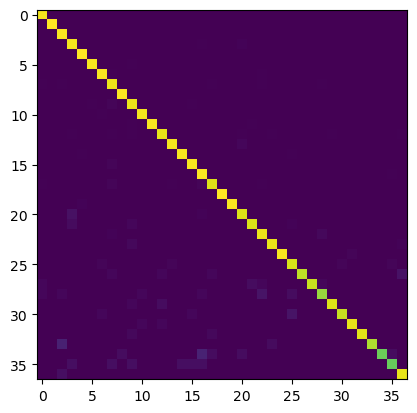

In [9]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
y_true = y_test
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_true, y_pred, normalize= "true")
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=classifier.classes_)
plt.imshow(cm)

In [12]:
from sklearn.metrics import classification_report
label_names = lines
y_true = y_test
y_pred = classifier.predict(X_test)
print(classification_report(y_true, y_pred, target_names=label_names))

              precision    recall  f1-score   support

        cas1       1.00      0.98      0.99      1232
        cas2       1.00      1.00      1.00      1169
        cas5       0.99      0.99      0.99       795
        cas7       0.98      0.98      0.98       685
        cas3       1.00      1.00      1.00       584
       cas6e       0.99      0.98      0.99       462
       cas8e       0.99      0.99      0.99       454
    cse2gr11       0.96      0.97      0.96       453
        cas4       1.00      0.99      1.00       343
        cas6       0.95      0.97      0.96       339
        cas9       0.99      0.98      0.99       290
       cas10       1.00      0.99      0.99       187
     csm3gr7       0.97      0.96      0.97       185
       cas8c       0.99      0.98      0.98       165
        csn2       0.98      0.99      0.98       154
       cas6f       0.95      0.99      0.97       146
       cas7f       0.91      0.99      0.95       146
       cas8f       0.95    